<a href="https://colab.research.google.com/github/NeryLuciano/Ling-de-Prog-para-Ciencia-de-Dados/blob/main/Tarefa4_Paradigmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando o Gapminder como fonte de dados

Nome: Luciano Nery Fernandes

Importando as ferramentas necessárias

1.   pandas
2.   matplotlib
3.   seaborn




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.09,3.97,5.82,5.61,3.79,5.3,6.3,3.37,3.28,3.71,6.57,2.2,1.05,5.63,4.53,2.1,2.17,3.33,2.95,5.95,5.07,1.73,−0.677,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7,11.3,10.9,7.2,22.5,2.1,−2.16,3.81,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,−2.1,0,0.0128,0.00119,19,−9.01,9.82,2.21,16.3,14,106,477,918,2180,1830,4800,95.5,39.4,558,418,106,197,93.9,33.4,42.4,17.1,4.31,19.4,−16.8,32.3,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,−2.14,−0.0177,−0.0168,−0.0284,0.351,−2.42,−0.00031,−0.00058,0.00368,−0.431,35.5,233,126,35.8,9.97,38.2,11.2,6.73,2.1,5.64,3.81,3.64,5.2,3.16,3.3,2.48,4.39,4.12,2.42,4.49,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.85,8.52,11.8,15.9,16.8,16.5,23.4,20.6,16.9,13.4,12.4,13.6,11.9,10.9,8.6,10.9,5.94,5.94,6.9,7.33,6.94,6.71,4.54,3.88,4.93,0.797,2.23,1.5,2.73,28.7,3.08,3.24,3.18,3.04,3.4,3.46,3.21,2.27,0.132,0.374,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


Buscando arquivos (Foi utilizado uma base de dados local)

In [ ]:
inflation = pd.read_csv ('/content/inflation_annual_percent.csv')
gini = pd.read_csv ('/content/gini.csv')

inflation.head()

In [3]:
gini.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.1,56.9,56.8,56.6,56.4,56.1,55.9,55.7,55.4,55.1,54.7,54.4,54.1,53.7,53.4,53.1,52.7,52.4,52.1,51.7,51.4,...,51.3,50.6,49.7,48.5,47.3,46.2,45.0,44.1,43.4,42.9,42.7,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
2,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,30.7,31.0,31.1,31.0,30.7,30.4,30.2,30.0,29.7,29.5,29.3,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,United Arab Emirates,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


Referente ao Brasil, obtenha os dados de inflação e desigualdade social.

In [4]:
inflation_BR = inflation[ inflation.country == 'Brazil']
gini_BR = gini[ gini.country == 'Brazil']



Mudando a forma de visualização para obter colunas definidas

In [5]:
BR_inflation = pd.melt(inflation_BR, id_vars=['country'])
BR_inflation = BR_inflation.rename(columns= {'variable' : 'Year', 'value' : 'Inflation'})
BR_inflation.head()

,country,Year,Inflation
0,Brazil,1960,31.3
1,Brazil,1961,78.8
2,Brazil,1962,69.8
3,Brazil,1963,93.8
4,Brazil,1964,51.4


In [6]:
BR_gini = pd.melt(gini_BR, id_vars=['country'])
BR_gini = BR_gini.rename(columns = {'variable':'Year','value':'Inequality'})
BR_gini.head()

,country,Year,Inequality
0,Brazil,1799,37.9
1,Brazil,1800,37.9
2,Brazil,1801,37.9
3,Brazil,1802,37.9
4,Brazil,1803,37.9


Juntando as tabelas de Inflação e Desigualdade

In [7]:
BR = pd.merge(BR_inflation, BR_gini, on=['country','Year'])

BR.head()

,country,Year,Inflation,Inequality
0,Brazil,1960,31.3,44.8
1,Brazil,1961,78.8,45.2
2,Brazil,1962,69.8,45.7
3,Brazil,1963,93.8,46.1
4,Brazil,1964,51.4,46.5


Modificando a coluna [Inflation] para (float)

In [8]:
BR.dtypes

BR['Inflation'] = BR['Inflation'].astype(float)


Plotando correlação entre Inflação e Desigualdade

No handles with labels found to put in legend.


<Figure size 864x432 with 0 Axes>

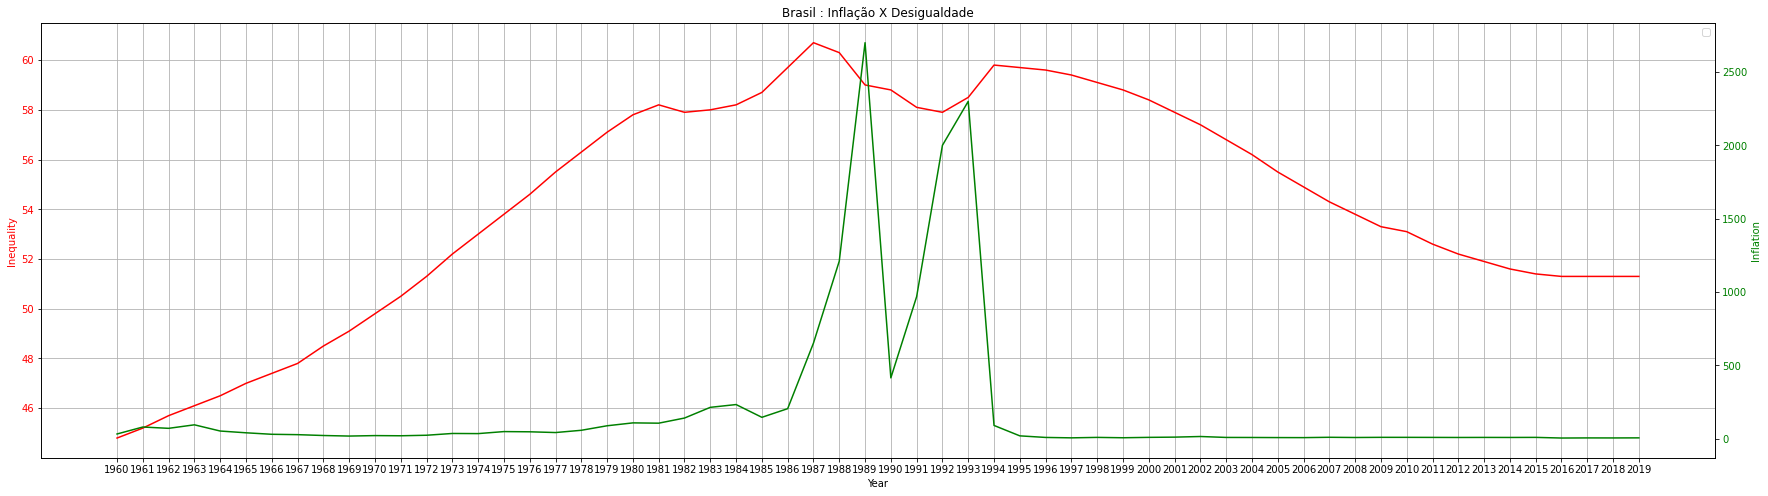

In [10]:
plt.figure(figsize=(12,6))



fig,ax = plt.subplots(figsize = (30,8))

ax.set_xlabel('Year')
ax.set_ylabel('Inequality', color = 'red')
ax.plot (BR.Year, BR.Inequality,color='red')
ax.tick_params(axis = 'y', labelcolor = 'red')

ax.grid()
ax2 = ax.twinx()
ax2.set_ylabel('Inflation', color = 'green')

ax2.plot (BR.Year, BR.Inflation,color = 'green')
ax2.tick_params(axis = 'y', labelcolor = 'green')

plt.title('Brasil : Inflação X Desigualdade')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Conclusão:
  Olhando rápidamente para o gráfico é possivel perceber que a desigualdade vem crescendo até o ano de 1995, quando o Brasil conseguiu estabilizar a inflação, com o inicio desta estabilização a desigualdade social iniciou uma queda.



